In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib import collections  as mc
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
# read csv
df = pd.read_csv("kubrick.csv")
# trim whitespace from around the column names
df.columns = [col.strip() for col in list(df.columns)]

# Convert year strings (e.g. 2014) to datetime
#df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

In [3]:
df = df.sort_values(by=['Year', 'Title'])

In [4]:
df.head()

,Year,Title
0,1951,Day of the Fight
1,1951,Flying Padre
2,1953,Fear and Desire
3,1953,The Seafarers
4,1955,Killer's Kiss


In [5]:
from scale import LinearScale
options = {
        "initialWidth": 112,
        "initialHeight": 1000,
        "scale": LinearScale(),
        "direction": "right",
        "dotColor": "#000000",
        "labelBgColor": "#aaaaaa",
        "linkColor": "#ff0000",
        "labelPadding": {"left": 0, "right": 0, "top": 10, "bottom": 10},
        "labelHeight": 40,
        "labella": {
            "minPos": 0,
            "maxPos": 960,
            "nodeHeight": 10,
        },
        "showTicks": False,
        "latex": {"reproducible": True}
    }

In [6]:
# import the modified Labella.py timeline
import timeline

In [7]:
df['time'] = df['Year']
df['text'] = df['Title']
ts = df.to_dict('records')
tl = timeline.Timeline(ts, options=options)
fc = tl.forceCompute()

In [8]:
htz = [float(f.idealPos) for f in fc]
yrz = [float(f.currentPos) for f in fc]
cols = [list(np.random.choice(range(100,220), size=3)/255.0) for f in fc]

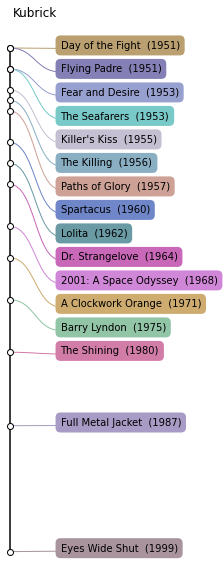

In [9]:
rightOffset = 1

# Create figure and plot a stem plot with the date
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html
fig, ax = plt.subplots(figsize=(3, 8), constrained_layout=True)
ax.set(title="Kubrick")

ax.plot(np.zeros_like(df['Year'], dtype=int), htz, "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, h, y, r, c in zip(yrz, htz, df['Year'], df['Title'], cols):
    ax.text(rightOffset, d, r + " (" + str(y) + ")",
            fontsize=10,
            backgroundcolor='red',
            bbox=dict(boxstyle='round,pad=0.5', fc=c, ec='none'))
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
    path = Path([(0., h),(rightOffset*0.5, h),(rightOffset - rightOffset*0.5, d),(rightOffset, d)], codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=c)
    ax.add_patch(patch)
    
# invert y axis
ax.invert_yaxis()

# remove y axis and spines
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()